# Assignment 4 - Lorgna Lorenzo - 829776

# Richiesta
Plot the average anomaly map for the [psl] or [ts] variable, between the periods 1950-2000 and 1900-1950. Free choice of the model.


In [1]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs

import xarray as xr

# Selezione dataset

In [2]:
# selezione modello

model = 'MRI-ESM2-0'
modfile = ''.join(['C:/Users/loren/Desktop/psl_Amon_', model, '_historical_r1i1p1f1_gn_185001-201412.nc'])
ds = xr.open_dataset(modfile)
ds

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    psl        (time, lat, lon) float32 ...
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-02-20T02:32:52Z
    ...                     ...
    title:                  MRI-ESM2-0 output prepared for CMIP6
    variable_id:            psl
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MRI is licensed unde...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/36275bcc-884a-4960-b367-bd644a1fbb6b

In [3]:
# si opta per la variabile psl

psl = ds.psl/100  # (pa to hPa)
psl

<xarray.DataArray 'psl' (time: 1980, lat: 160, lon: 320)>
array([[[ 998.3732 ,  998.3793 ,  998.3853 , ...,  998.35443,
          998.3608 ,  998.367  ],
        [ 997.5943 ,  997.6133 ,  997.63226, ...,  997.5371 ,
          997.5561 ,  997.57526],
        [ 996.4827 ,  996.53156,  996.58124, ...,  996.34406,
          996.3887 ,  996.43494],
        ...,
        [1012.5199 , 1012.45386, 1012.3876 , ..., 1012.718  ,
         1012.6521 , 1012.5861 ],
        [1012.40265, 1012.35815, 1012.31354, ..., 1012.53595,
         1012.4916 , 1012.4471 ],
        [1012.2148 , 1012.1943 , 1012.17377, ..., 1012.2756 ,
         1012.2554 , 1012.23517]],

       [[ 999.5828 ,  999.59033,  999.5973 , ...,  999.5574 ,
          999.56635,  999.5748 ],
        [ 999.4464 ,  999.47986,  999.512  , ...,  999.33936,
          999.37604,  999.4118 ],
        [ 998.5287 ,  998.6156 ,  998.7024 , ...,  998.27057,
          998.3558 ,  998.44196],
...
        [1004.6948 , 1004.6178 , 1004.5411 , ..., 1004.92737,
         1004.8497 , 1004.7722 ],
        [1005.9126 , 1005.87195, 1005.832  , ..., 1006.03784,
         1005.99554, 1005.95374],
        [1007.2223 , 1007.2092 , 1007.1964 , ..., 1007.2631 ,
         1007.2492 , 1007.23553]],

       [[1002.0424 , 1002.04877, 1002.055  , ..., 1002.02295,
         1002.0296 , 1002.0361 ],
        [1001.1183 , 1001.1364 , 1001.15454, ..., 1001.06476,
         1001.0826 , 1001.1004 ],
        [ 999.4966 ,  999.5549 ,  999.6153 , ...,  999.3367 ,
          999.3873 ,  999.4407 ],
        ...,
        [1006.24445, 1006.21704, 1006.1895 , ..., 1006.3267 ,
         1006.2992 , 1006.2718 ],
        [1006.27905, 1006.25476, 1006.2307 , ..., 1006.3538 ,
         1006.3286 , 1006.30365],
        [1006.5993 , 1006.5856 , 1006.57196, ..., 1006.64124,
         1006.6272 , 1006.6132 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9

# Calcolo anomalie considerando i due periodi di riferimento

In [4]:
# periodo 1900-1950

psl_1900_1950 = psl.sel(time=slice('1900','1950')).mean('time')
psl_1900_1950

<xarray.DataArray 'psl' (lat: 160, lon: 320)>
array([[1004.316  , 1004.316  , 1004.31433, ..., 1004.31415, 1004.31494,
        1004.31586],
       [1004.3794 , 1004.39923, 1004.4172 , ..., 1004.3108 , 1004.33545,
        1004.35815],
       [1003.492  , 1003.58514, 1003.6763 , ..., 1003.20966, 1003.30475,
        1003.3982 ],
       ...,
       [1011.79767, 1011.78534, 1011.7732 , ..., 1011.83405, 1011.8221 ,
        1011.80945],
       [1011.99725, 1011.98987, 1011.9841 , ..., 1012.0199 , 1012.0114 ,
        1012.0043 ],
       [1012.30554, 1012.30237, 1012.29987, ..., 1012.3139 , 1012.31036,
        1012.3081 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9

In [5]:
# periodo 1951-2000

psl_1951_2000 = psl.sel(time=slice('1951', '2000')).mean('time')
psl_1951_2000

<xarray.DataArray 'psl' (lat: 160, lon: 320)>
array([[1004.47565, 1004.4749 , 1004.47284, ..., 1004.4723 , 1004.47437,
        1004.4748 ],
       [1004.50903, 1004.52826, 1004.5454 , ..., 1004.44147, 1004.4655 ,
        1004.48804],
       [1003.597  , 1003.68866, 1003.7789 , ..., 1003.31604, 1003.40924,
        1003.50323],
       ...,
       [1011.4674 , 1011.45844, 1011.4497 , ..., 1011.49615, 1011.4863 ,
        1011.4775 ],
       [1011.66425, 1011.65894, 1011.6548 , ..., 1011.68024, 1011.675  ,
        1011.66956],
       [1011.9527 , 1011.9506 , 1011.94885, ..., 1011.95886, 1011.957  ,
        1011.9551 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9

In [6]:
# calcolo delle anomalie per la variabile psl tra i due periodi, 1951-2000 e 1900-1950

psl_anom = psl_1951_2000-psl_1900_1950
psl_anom

<xarray.DataArray 'psl' (lat: 160, lon: 320)>
array([[ 0.15966797,  0.15893555,  0.1585083 , ...,  0.15814209,
         0.15942383,  0.15893555],
       [ 0.12963867,  0.12902832,  0.12823486, ...,  0.13067627,
         0.13006592,  0.12988281],
       [ 0.10498047,  0.10351562,  0.1026001 , ...,  0.10638428,
         0.10449219,  0.1050415 ],
       ...,
       [-0.33026123, -0.3269043 , -0.32348633, ..., -0.33789062,
        -0.3357544 , -0.3319702 ],
       [-0.3330078 , -0.33093262, -0.32928467, ..., -0.33966064,
        -0.33642578, -0.3347168 ],
       [-0.35284424, -0.3517456 , -0.35101318, ..., -0.3550415 ,
        -0.35339355, -0.35302734]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9

# Visualizzazione grafica

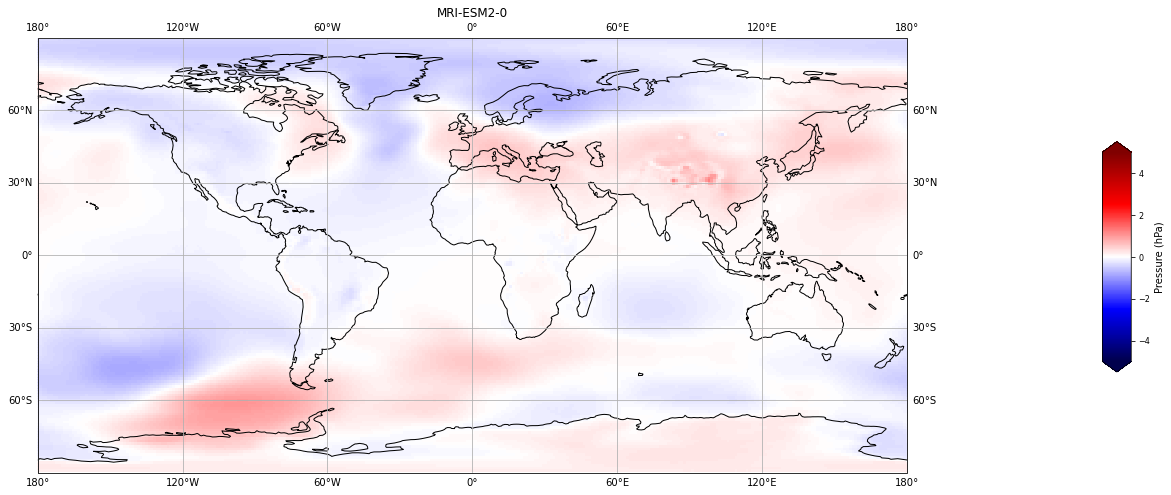

In [7]:
fig = plt.figure(figsize=(20,8))  # x,y(inches)

tmax = 5  # hPa
norm = mpl.colors.Normalize(vmin=-tmax,vmax=tmax)
cmap = mpl.cm.seismic

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(model)
ax.set_global()
mm = ax.pcolormesh(psl.lon, psl.lat, psl_anom,
                   transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.95, 0.30, 0.02, 0.40]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='vertical')
cbar.set_label('Pressure (hPa)')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()